In [29]:
!pip install openpyxl
!pip install statsmodels

You should consider upgrading via the 'C:\Users\pasin\DS\Клуб\nuclear-hack\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\pasin\DS\Клуб\nuclear-hack\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [30]:
import pandas as pd
# import openpyxl
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
data = pd.read_excel("Data\пп_станции.xlsx")

In [13]:
data

,Станция,Номер линии,Дата,2024-04-03 00:00:00,2024-04-02 00:00:00,2024-04-01 00:00:00,2024-03-31 00:00:00,2024-03-30 00:00:00,2024-03-29 00:00:00,2024-03-28 00:00:00,...,2024-01-10 00:00:00,2024-01-09 00:00:00,2024-01-08 00:00:00,2024-01-07 00:00:00,2024-01-06 00:00:00,2024-01-05 00:00:00,2024-01-04 00:00:00,2024-01-03 00:00:00,2024-01-02 00:00:00,2024-01-01 00:00:00
0,Б.Рокоссовского,8,СОКОЛЬНИЧЕСКАЯ,16671,15113,2905,13998,12742,1217,17624,...,7280,4669,3812,5816,15740,13714,2561,11209,2722,4835
1,Черкизовская,8,СОКОЛЬНИЧЕСКАЯ,6248,5441,7991,14864,10015,9721,6623,...,13486,5061,3663,11353,6924,6496,15991,7029,3999,15638
2,Преображенск. пл,8,СОКОЛЬНИЧЕСКАЯ,14094,1132,6556,7265,4001,10961,6852,...,8176,9745,13281,15090,13309,8365,2811,5004,17068,17117
3,Сокольники СЛ,8,СОКОЛЬНИЧЕСКАЯ,18651,10083,6488,6409,9446,12051,15041,...,3637,14001,12049,15972,15545,18759,5573,15017,14176,5465
4,Красносельская,8,СОКОЛЬНИЧЕСКАЯ,7391,19339,15424,10725,5965,14682,18134,...,14194,7615,9321,16152,4581,7746,8936,11373,19561,1727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Аэропорт Внуково,1691,СОЛНЦЕВСКАЯ ЛИН.,15787,10257,13493,8656,5761,18352,6449,...,9654,17815,12401,15277,13153,19801,17569,13950,7545,14178
318,Яхромская,18,ЛЮБЛИНСКАЯ,9813,19663,12491,9180,3563,19023,5655,...,12471,17980,2322,6341,16395,14759,14798,17189,3864,12536
319,Лианозово,18,ЛЮБЛИНСКАЯ,18978,8499,2959,12203,9070,3349,5543,...,17639,14071,17237,16304,8357,5616,16496,8603,16046,5489
320,Физтех,18,ЛЮБЛИНСКАЯ,1476,2893,9897,9793,9822,4534,4115,...,16336,17256,14147,2938,15037,3834,5997,5933,4969,5404


In [14]:
data.describe()

,Номер линии,2024-04-03 00:00:00,2024-04-02 00:00:00,2024-04-01 00:00:00,2024-03-31 00:00:00,2024-03-30 00:00:00,2024-03-29 00:00:00,2024-03-28 00:00:00,2024-03-27 00:00:00,2024-03-26 00:00:00,...,2024-01-10 00:00:00,2024-01-09 00:00:00,2024-01-08 00:00:00,2024-01-07 00:00:00,2024-01-06 00:00:00,2024-01-05 00:00:00,2024-01-04 00:00:00,2024-01-03 00:00:00,2024-01-02 00:00:00,2024-01-01 00:00:00
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,...,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,600.003106,10541.397516,10773.149068,10646.186335,10891.543478,10224.440994,9896.183230,10816.555901,10417.928571,10487.385093,...,10674.667702,10453.223602,10747.593168,10800.012422,11011.003106,9783.583851,10500.105590,10245.829193,10526.791925,10774.577640
std,790.140559,5388.876011,5520.337086,5553.427220,5588.684872,5464.406376,5375.932095,5435.532608,5679.882075,5439.834355,...,5446.223332,5440.166430,5239.276952,5456.765700,5380.292751,5453.386083,5280.640568,5473.316385,5390.053535,5423.018987
min,8.000000,1015.000000,1034.000000,1040.000000,1009.000000,1030.000000,1113.000000,1055.000000,1037.000000,1003.000000,...,1004.000000,1008.000000,1066.000000,1061.000000,1047.000000,1023.000000,1071.000000,1005.000000,1004.000000,1093.000000
25%,13.000000,5991.750000,6449.750000,6156.500000,5972.750000,5761.000000,5126.750000,5979.750000,5454.000000,5458.250000,...,6183.500000,5678.250000,6377.500000,6115.500000,6364.750000,5266.250000,5821.500000,5671.750000,5696.750000,5842.250000
50%,17.000000,10463.000000,10842.500000,10422.000000,11045.500000,9757.500000,9377.000000,11035.500000,10512.000000,11023.500000,...,10997.000000,10814.500000,10809.000000,11012.500000,11482.500000,9011.500000,10934.500000,10179.500000,10584.000000,10792.000000
75%,1691.000000,15132.500000,15220.250000,15425.500000,15807.000000,15204.000000,14230.000000,15611.250000,15052.750000,15257.750000,...,15173.250000,15084.500000,15211.750000,15519.000000,15680.750000,14260.250000,14593.750000,15271.750000,15092.000000,15481.250000
max,1779.000000,19856.000000,19994.000000,19901.000000,19837.000000,19902.000000,19867.000000,19970.000000,19994.000000,19882.000000,...,19887.000000,19965.000000,19815.000000,19905.000000,19974.000000,19936.000000,19919.000000,19960.000000,19883.000000,19991.000000


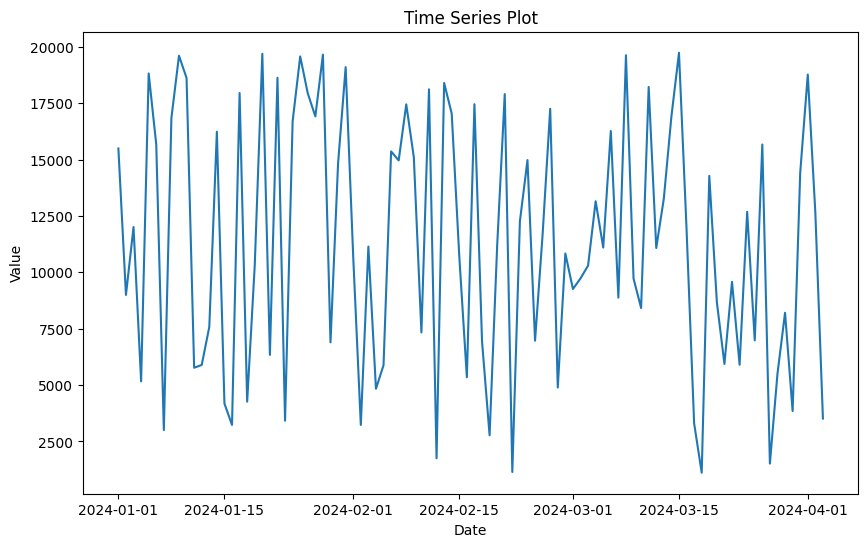

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(data.columns[3::], data.iloc[200][3::])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot')
plt.show()

In [32]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,312,313,314,315,316,317,318,319,320,321
Станция,Б.Рокоссовского,Черкизовская,Преображенск. пл,Сокольники СЛ,Красносельская,Комсомольск. СЛ,Красные ворота,Чистые пруды,Лубянка,Охотный ряд,...,Нижегород-я БКЛ,Каширская (Зам),Нижегород-я НБС,К,Пыхтино,Аэропорт Внуково,Яхромская,Лианозово,Физтех,Текстильщики СЦ
Номер линии,8,8,8,8,8,8,8,8,8,8,...,1749,9,1779,1749,1691,1691,18,18,18,1749
Дата,СОКОЛЬНИЧЕСКАЯ,СОКОЛЬНИЧЕСКАЯ,СОКОЛЬНИЧЕСКАЯ,СОКОЛЬНИЧЕСКАЯ,СОКОЛЬНИЧЕСКАЯ,СОКОЛЬНИЧЕСКАЯ,СОКОЛЬНИЧЕСКАЯ,СОКОЛЬНИЧЕСКАЯ,СОКОЛЬНИЧЕСКАЯ,СОКОЛЬНИЧЕСКАЯ,...,БКЛ,ЗАМОСКВОРЕЦКАЯ,НЕКРАСОВСКАЯ,БКЛ,СОЛНЦЕВСКАЯ ЛИН.,СОЛНЦЕВСКАЯ ЛИН.,ЛЮБЛИНСКАЯ,ЛЮБЛИНСКАЯ,ЛЮБЛИНСКАЯ,БКЛ
2024-04-03 00:00:00,16671,6248,14094,18651,7391,8883,3067,12873,8554,19856,...,3362,18534,16779,18248,8390,15787,9813,18978,1476,18055
2024-04-02 00:00:00,15113,5441,1132,10083,19339,15442,7139,11038,15482,7671,...,1525,5763,14810,8141,16045,10257,19663,8499,2893,18422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-05 00:00:00,13714,6496,8365,18759,7746,5709,1873,15867,4428,13439,...,7862,15306,15953,3694,14040,19801,14759,5616,3834,13438
2024-01-04 00:00:00,2561,15991,2811,5573,8936,15712,2772,11590,10987,13708,...,4543,6940,9599,9883,10988,17569,14798,16496,5997,7997
2024-01-03 00:00:00,11209,7029,5004,15017,11373,5649,10104,4453,5127,15905,...,11046,9394,13688,3650,8035,13950,17189,8603,5933,10796
2024-01-02 00:00:00,2722,3999,17068,14176,19561,4700,3868,14364,15485,2078,...,4652,10092,18652,10583,11124,7545,3864,16046,4969,11741


In [33]:
result = seasonal_decompose(data.iloc[200][3::], model='additive')

plt.figure(figsize=(15, 8))

plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='lower right', fontsize='large')

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='lower right', fontsize='large')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='lower right', fontsize='large')

plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='lower right', fontsize='large')

plt.tight_layout()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None